# Non-Linear Regression 
### use the linear regression model from scikit-learn and modify it to be usable on polynomial features

In [1]:
#import numpy and name it np as always
import numpy as np

#import only needed method and classes from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#import matplotlib for visualization
import matplotlib.pyplot as plt

### Import data and check its shape

In [2]:
data = np.load('data.npy')

x_data = data[:,0]
y_data = data[:,1]
print(f'data shape = {x_data.shape[0]}, labels shape = {y_data.shape[0]}')

x_data = np.reshape(x_data,(-1,1))

# x_data = np.concatenate(((np.ones(x_data.shape[0]).reshape(-1,1)),x_data),axis = 1)
# print(x_data[:5])

data shape = 400, labels shape = 400


### Visualize the data to see its spread

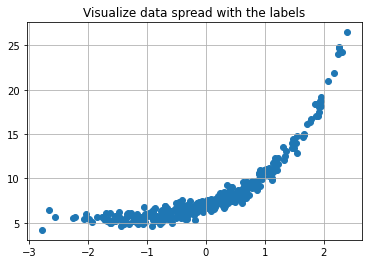

In [3]:
# plt.scatter(x_data[:,1],y_data)
plt.scatter(x_data,y_data)
plt.grid()
plt.title('Visualize data spread with the labels')

plt.show()

### Data pre-processing and split it into train and test sets 

In [4]:
scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle= True)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Use Linear Regression and see its output Then visualize the regression line

In [5]:
reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
theta_0 = reg.intercept_
theta_1 = reg.coef_[0]

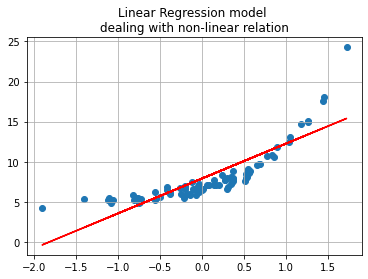

In [6]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred, c= 'r')

plt.grid()
plt.title('Linear Regression model \ndealing with non-linear relation')

plt.show()

### Calculate r2 score and mean squared error

In [7]:
rmse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

3.390513189137571
0.6924901158265232


## Use PolynomialFeatures to tranform the data into polynomial features
### Let's try it on Train data

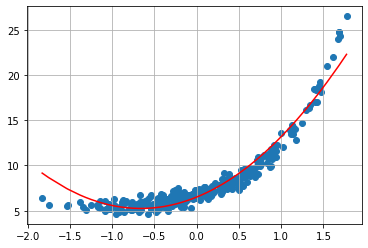

In [8]:
#create an object from PolynomialFeatures()
ploy = PolynomialFeatures()

#Fit and transform train data
x_train_p =ploy.fit_transform(X_train)

#use linear regression but with poly features
reg.fit(x_train_p, y_train)

#see the prediction line also on training data
y_poly_pred = reg.predict(x_train_p)

#create a prediction line
sorted_zip = sorted(zip(X_train,y_poly_pred))
x, y_poly_pred = zip(*sorted_zip)

#plot the scatterd data and prediction line
plt.scatter(X_train,y_train)
plt.grid()
plt.plot(x, y_poly_pred, color='r')

## Let's use the polynomial on test data


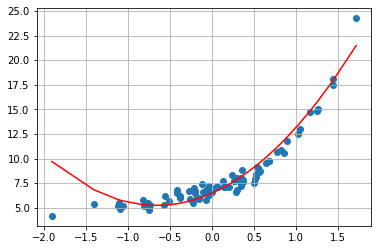

In [9]:
#transform test data into ploynomial feature
x_test_p =ploy.transform(X_test)

#predict the ploynoial test data 
y_poly_test = reg.predict(x_test_p)

#create a prediction line
sorted_zip = sorted(zip(X_test,y_poly_test))
x, y_poly_test = zip(*sorted_zip)

#plot the scatterd data and prediction line
plt.scatter(X_test,y_test)
plt.grid()
plt.plot(x, y_poly_test, color='r')

### Calculate r2 score and mean squared error

In [10]:
rmse = mean_squared_error(y_test,y_poly_test)
r2 = r2_score(y_test,y_poly_test)
print(rmse)
print(r2)

22.533269634356465
-1.0437033418746937


## Reason why R2 is not good for Non-Linear Regression 
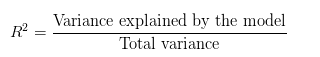

R-squared is invalid for nonlinear regression. 

Furthermore, the variances always add up in a particular way:
Explained variance + Error variance = Total variance.

However, this math works out correctly only for linear regression models. In nonlinear regression, these underlying assumptions are incorrect. 

Explained variance + Error variance DO NOT add up to the total variance! 
The result is that R-squared isn’t necessarily between 0 and 100%. There are other problems with it as well.

### For more details just check :
https://statisticsbyjim.com/regression/r-squared-invalid-nonlinear-regression